In [ ]:
Question 1: What is Simple Linear Regression?
Ans 1 : Simple linear regression is a statistical method used to model the linear relationship between a single independent variable and a single dependent variable.
 It finds the best-fitting straight  line through a set of data points to predict the value of the dependent variable
 based on the independent variable.

Question 2: What are the key assumptions of Simple Linear Regression?
Ans 2 :  Linearity: There must be a linear relationship between the independent variable (X) and the dependent variable (Y).
Normality of residuals: The residuals must be approximately normally distributed.
Homoscedasticity: The variance of the residuals must be constant across all levels of the independent variable.
Independence of errors: The residuals (the differences between observed and predicted values) must be independent of each other.

Question 3: What is heteroscedasticity, and why is it important to address in regression models?
Ans 3 : it makes the standard errors of the model incorrect, which leads to unreliable confidence
       intervals and hypothesis tests, making the model's conclusions misleading.

Question 4: What is Multiple Linear Regression?
Ans 4: statistical method that uses two or more independent variables to predict the value of a single dependent variable

Question 5: What is polynomial regression, and how does it differ from linear regression?
Ans 5 : Polynomial regression models a non-linear relationship between an independent and dependent variable by fitting a polynomial equation
       ((y=b_{0}+b_{1}x+b_{2}x*{2}+...+b_{k}x*{k})) to the data,
      while linear regression assumes a straight-line relationship, modeled by the equation (y=b_{0}+b_{1}x).

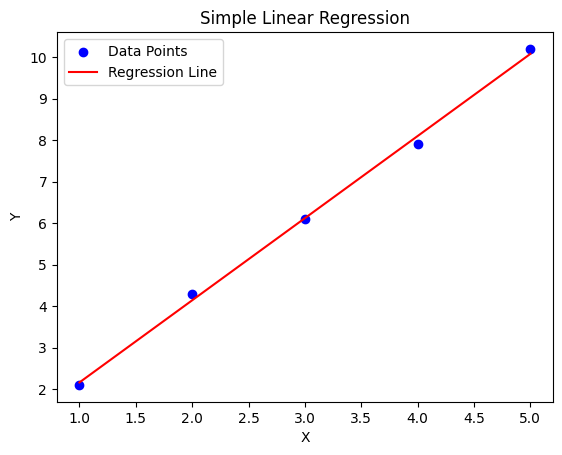

In [1]:
# Question 6: Implement a Python program to fit a Simple Linear Regression model to
# the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])      # Target

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [2]:
# Question 7: Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define independent (X) and dependent (y) variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Display model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print(f"Equation: Price = {model.intercept_:.2f} + ({model.coef_[0]:.2f})*Area + ({model.coef_[1]:.2f})*Rooms")

# Add a constant for VIF calculation
X_const = sm.add_constant(X)

# Calculate Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif)


Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]
Equation: Price = 103157.89 + (63.16)*Area + (34736.84)*Rooms

Variance Inflation Factor (VIF) Results:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938
Equation: Y = 0.06 + 1.94X + 0.20X²


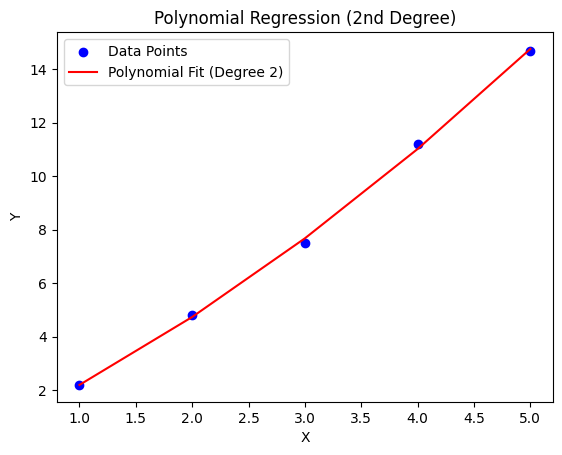

In [3]:
# Question 8: Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features to include polynomial terms (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict Y values
Y_pred = model.predict(X_poly)

# Print model parameters
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Equation: Y = {:.2f} + {:.2f}X + {:.2f}X²".format(model.intercept_, model.coef_[1], model.coef_[2]))

# Plot original data and polynomial regression curve
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit (Degree 2)')
plt.title('Polynomial Regression (2nd Degree)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Intercept: 6.499999999999993
Slope: 1.1500000000000001
Equation: Y = 6.50 + 1.15X


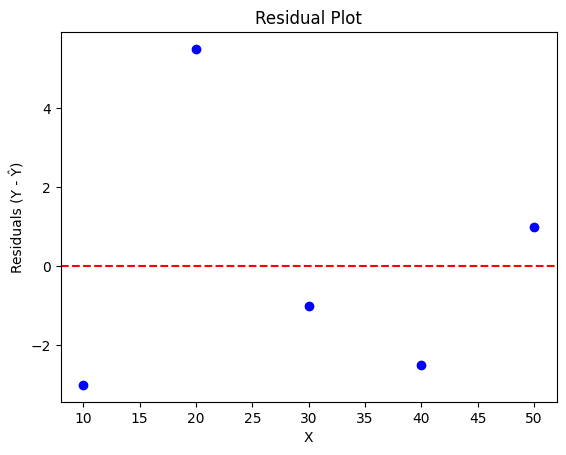

In [4]:
# Question 9: Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Calculate residuals (difference between actual and predicted)
residuals = Y - Y_pred

# Print summary
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Equation: Y = {:.2f} + {:.2f}X".format(model.intercept_, model.coef_[0]))

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('X')
plt.ylabel('Residuals (Y - Ŷ)')
plt.show()


In [ ]:
# Question 10: Imagine you are a data scientist working for a real estate company. You
# need to predict house prices using features like area, number of rooms, and location.
# However, you detect heteroscedasticity and multicollinearity in your regression
# model. Explain the steps you would take to address these issues and ensure a robust
# model.
Detect it:
Use VIF (Variance Inflation Factor) — values > 5 or 10 indicate high multicollinearity.
Check correlation matrix / heatmap.
Remove or combine correlated features:
Drop one redundant variable (e.g., keep Area and drop Rooms).
Combine correlated variables (e.g., Area per room).
Use Regularization techniques:
Ridge Regression (L2) — shrinks coefficients but keeps all variables.
Lasso Regression (L1) — can set some coefficients to zero, performing feature selection.
Principal Component Regression (PCR):
Transform correlated variables into uncorrelated components using PCA.
